need to do - review colours for red, green and yellow
improve x-y coordinate stuff
work on get force stuff!

For some reason my shit is not working - might have to try simple approach of just going over it?

In [5]:
# Import all libraries!
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np
import requests
import shutil
import time
import logging
import urx
from urx.robotiq_two_finger_gripper import Robotiq_Two_Finger_Gripper
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# from urx.urrtmon import URRTMonitor

#image: http://192.168.1.6:4242/current.jpg?type=color

cam_init_pos = [-0.00043183961977177887, -1.651595417653219, -1.226389233266012, -1.276344124470846, -4.72298783460726, 0.001785649568773806]
bucket_pos = [1.6486937999725342, -2.4073990027057093, -1.8858941237079065, -0.36886865297426397, -4.742553655301229, 0.0471811443567276]
hardcode_object_loc = [-0.024045769368306935, -1.8617809454547327, -1.511141602193014, -1.4511950651751917, -4.672266546879904, 0.047373268753290176]
bucket_pick = [-0.04573041597475225, -1.8159015814410608, -1.2815788427936, -1.4384973684894007, -4.67054266134371, 0.04719312861561775]

In [6]:
def get_color(event,x,y,flags,param):
    global refPt1,refPt2,max_H,max_S,max_V,min_H,min_S,min_V
    #count = 0
    
    #print 'it worked'
    if event == cv2.EVENT_LBUTTONDOWN:
        #cv2.circle(img,(x,y),100,(255,0,0),-1)
        refPt1 =[(x,y)]
        #print "x coord: " + str(mouseX)
        #print "y coord: " + str(mouseY)
        #print "hsv: " + str(HSV_img[mouseY,mouseX])
    elif event == cv2.EVENT_LBUTTONUP:
        refPt2 =[(x,y)]
        dist = int(np.sqrt((refPt2[0][0]-refPt1[0][0])**2+(refPt2[0][1]-refPt1[0][1])**2))
        print dist
        cv2.circle(img,refPt1[0],dist,(0,255,0),2)
        max_H = HSV_img[refPt1[0][1]][refPt1[0][0]][0]
        max_S = HSV_img[refPt1[0][1]][refPt1[0][0]][1]
        max_V = HSV_img[refPt1[0][1]][refPt1[0][0]][2]
        min_H = HSV_img[refPt1[0][1]][refPt1[0][0]][0]
        min_S = HSV_img[refPt1[0][1]][refPt1[0][0]][0]
        min_V = HSV_img[refPt1[0][1]][refPt1[0][0]][0]
        for i in range(-dist,dist):
            for j in range(-dist,dist):
                #print "H: " + str(HSV_img[refPt1[0][1]+i][refPt1[0][0]+j][0]) + " S: " + str(HSV_img[refPt1[0][1]+i][refPt1[0][0]+j][1]) + " V: " + str(HSV_img[refPt1[0][1]+i][refPt1[0][0]+j][2])
                if HSV_img[refPt1[0][1]][refPt1[0][0]][0] - 10 < HSV_img[refPt1[0][1]+i][refPt1[0][0]+j][0]:
                    min_H = min(HSV_img[refPt1[0][1]+i][refPt1[0][0]+j][0],min_H)
                    min_S = min(HSV_img[refPt1[0][1]+i][refPt1[0][0]+j][1],min_S)
                    min_V = min(HSV_img[refPt1[0][1]+i][refPt1[0][0]+j][2],min_V)
                    max_S = max(HSV_img[refPt1[0][1]+i][refPt1[0][0]+j][1],max_S)
                    max_V = max(HSV_img[refPt1[0][1]+i][refPt1[0][0]+j][2],max_V)

                if HSV_img[refPt1[0][1]][refPt1[0][0]][0] + 10 > HSV_img[refPt1[0][1]+i][refPt1[0][0]+j][0]:
                    max_H = max(HSV_img[refPt1[0][1]+i][refPt1[0][0]+j][0],max_H)
                    min_S = min(HSV_img[refPt1[0][1]+i][refPt1[0][0]+j][1],min_S)
                    min_V = min(HSV_img[refPt1[0][1]+i][refPt1[0][0]+j][2],min_V)
                    max_S = max(HSV_img[refPt1[0][1]+i][refPt1[0][0]+j][1],max_S)
                    max_V = max(HSV_img[refPt1[0][1]+i][refPt1[0][0]+j][2],max_V)
#         print "H: " + str(min_H) + ", " + str(max_H)
#         print "S: " + str(min_S) + ", " + str(max_S)
#         print "V: " + str(min_V) + ", " + str(max_V)

In [7]:
def teach_bins(rob):
    '''
    Allows user to move robot to placement of bins
    Also need to allow user to take photo of object!??
    '''
    colours = []
    bins = []
    n_bins = int(raw_input("Please enter the number of bins you have: "))
    for i in range(n_bins):
        rob.set_freedrive(1, timeout=60)
        colours.append(raw_input("Press color of bin when complete: "))
        bins.append(rob.getj())
        
    print("Completed all bins!")
    return [colours, bins]

def get_image():
    '''
    Recieve latest image and save it in a folder
    '''
    
    image_url = "http://192.168.1.6:4242/current.jpg?type=color"
    
    resp = requests.get(image_url, stream=True)
    # Open a local file with wb ( write binary ) permission.
    img_string = 'images/latest_image.jpg'
    local_file = open(img_string, 'wb')
    # Set decode_content value to True, otherwise the downloaded image file's size will be zero.
    resp.raw.decode_content = True
    # Copy the response stream raw data to local image file.
    shutil.copyfileobj(resp.raw, local_file)
    # Remove the image url response object.
    del resp
    
    im = cv2.imread('images/latest_image.jpg')
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
    plt.show()
    
    print("image recieved")

def detect_photos(colour):
    '''
    Read in latest image and detect blobs of the given colour
    return the distance to the top left blob in form [X_from_center, Y_from_center] else returns None
    '''
    f = "images/latest_image.jpg"

    # two ranges because red stretchs over the Hue colour range
    
    ##RED
    lower_red_1 = (0,100,50)
    upper_red_1 = (5,255,255)

    lower_red_2 = (170,100,50)
    upper_red_2 = (180,255,255)
    
    ##GREEN
    lower_green = (45, 100, 50)
    upper_green = (65, 255, 255)
    
    ##YELLOW
    lower_yellow = (30, 100, 50)
    upper_yellow = (45, 255, 255)
    
    ##NEW
    lower_new = (int(min_H), 100, 50)
    upper_new = (int(max_H), 255, 255)
    print lower_new

    # reading in image to RGB and HSV
    img_RGB = cv2.cvtColor(cv2.imread(f), cv2.COLOR_BGR2RGB)
    img_HSV = cv2.cvtColor(img_RGB, cv2.COLOR_RGB2HSV)

    if colour == 'red':

        # Create two masks
        mask1 = cv2.inRange(img_HSV, lower_red_1, upper_red_1)
        mask2 = cv2.inRange(img_HSV, lower_red_2, upper_red_2)

        # XOR masks
        mask = cv2.bitwise_xor(mask1, mask2)
    elif colour == 'green':
        mask = cv2.inRange(img_HSV, lower_green, upper_green)

    elif colour == 'yellow':
        mask = cv2.inRange(img_HSV, lower_yellow, upper_yellow)
        
    elif colour == 'new':
        mask = cv2.inRange(img_HSV, lower_new, upper_new)


    # bitwise and with image
    result = cv2.bitwise_and(img_HSV, img_HSV, mask=mask)


    # put median blur over the top
    median = cv2.medianBlur(mask,23)

    print("pixel count: " + str(cv2.countNonZero(median)))

    if cv2.countNonZero(median) < 2000:
        print("no more objects in scene of colour: " + colour)
        return None

    # find connected components
    ret, labels = cv2.connectedComponents(median)

    # Map component labels to hue val
    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

    # cvt to BGR for display
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

    # set bg label to black
    labeled_img[label_hue==0] = 0

    #########################################################
    ## Finding Centers!
    ret,thresh = cv2.threshold(median,127,255,0)

    # find contours in the binary image
    ___, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

    distance_min = 100000
    for c in contours:
        # calculate moments for each contour
        M = cv2.moments(c)

        # calculate x,y coordinate of center
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            cv2.circle(labeled_img, (cX, cY), 5, (255, 255, 255), -1)

            distance_new = np.sqrt(cX**2 + cY**2)
            if distance_new < distance_min:
                distance_min = distance_new
                X_top_left = cX
                Y_top_left = cY

            print("centerpoints at: x: " + str(cX) + " y: " + str(cY))

    print("top left points are: x: " + str(X_top_left) + " y: " + str(Y_top_left))

#     X_from_center = X_top_left - (640/2)
#     Y_from_center = Y_top_left - (480/2)

#     print("distance from center: x: " + str(X_from_center) + " y: " + str(Y_from_center))

    # print out figures
    figure = plt.figure(figsize=(20,20))
    plt.subplot(1, 4, 1)
    # mask
    plt.imshow(mask, cmap="gray")
    plt.subplot(1, 4, 2)
    # median blue
    plt.imshow(median)
    #original image
    plt.subplot(1, 4, 3)
    plt.imshow(img_RGB)
    # final 
    plt.subplot(1, 4, 4)
    plt.imshow(labeled_img)

    plt.show()

#     return [X_from_center, Y_from_center]
    return [X_top_left, Y_top_left]

def test_robot(a = 0.2, v = 0.3):
    '''
    Test to see if robot is behaving normally
    '''
    # connecting to robot and initialising gripper
    while(1):
        try:
            rob = urx.Robot("192.168.1.6", use_rt=True)
        except:
            print("didnt connect, try again")
            time.sleep(1)
        else:
            break
    
    robotiqgrip = Robotiq_Two_Finger_Gripper(rob)

    robotiqgrip.open_gripper()

    # move to initial position
    rob.movej(cam_init_pos, acc = a, vel = v)


    pose = rob.getj()
    print("robot tcp is at pose: ", pose)

    rob.close()

def go_to_start(rob):
    rob.movej(cam_init_pos, acc = a, vel = v)
    print("moved to init position")
    

def rob_connect():
    while(1):
        try:
            #rob = urx.Robot("192.168.1.6")
            rob = urx.Robot("192.168.1.6", use_rt=True)
        except:
            print("didnt connect, try again")
            time.sleep(1)
        else:
            robotiqgrip = Robotiq_Two_Finger_Gripper(rob)
            return rob
    



def convert_to_mm(x, y):
    '''
    return mm from center!
    '''
    x = x - (640/2)
    y = y - (480/2)
    
    
    x = ((44.0/640.0) / 100) * x
    y = ((40.0/(480.0)) / 100) * y + 0.015
    y = y / 1.2
    
    
    return [x, y]




moved to init position


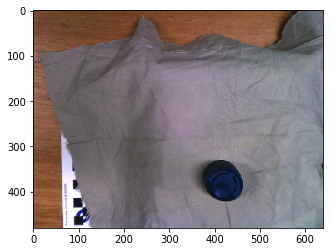

image recieved
22
H: 105, 120
Please enter the number of bins you have: 1
Press color of bin when complete: new
Completed all bins!
moved to init position


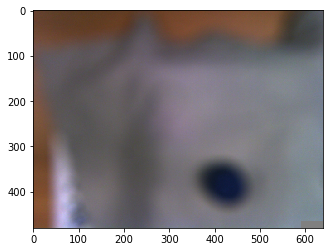

image recieved
(105, 100, 50)
pixel count: 3269
centerpoints at: x: 431 y: 387
top left points are: x: 431 y: 387


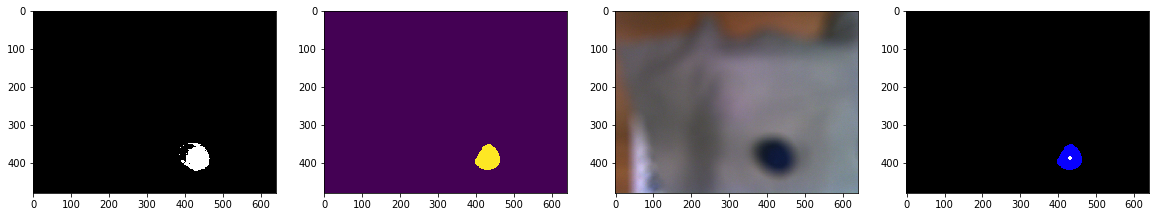

0.0763125
0.114583333333
0.0763125
0.114583333333
6.7630567949914795
2.2292136376646017
-3.07376439210332
2.8869740913821134
8.67662463755634
7.394763045347954
1.6647807798414145
1.8598169572100058
5.939196002931448
1.3370336886986929
3.8563201836502206
14.156613433181377
6.302756171230218
4.530367097553235
11.284532138556806
8.735764793962774
8.691080520916623
9.76957291657983
12.666349914914486
7.502326277406683
4.653100509136167
9.057672114393425
1.4997801889570186
1.2950123881346516
7.203687015717993
6.860642686252107
0.9529766806767765
0.8595331414892317
5.9037107823681865
2.1171257701175255
5.939268882948502
11.025831941649558
2.672449784228099
3.3734933957160025
11.123091256258475
6.070424191585033
2.5018875482187433
10.305625126926232
4.84433060974449
2.0838567122540104
6.414852155525259
12.71339629240189
2.952744453101702
6.619782916913162
12.582172601627002
6.801529515209549
2.245859962441787
3.007196071747494
5.372543281585682
-3.0166167039447327
4.471058523555322
8.92666613

8.020982267874478
6.15376189814818
4.537386590253208
3.1077770205778616
8.35082618545405
2.4448847306327206
2.8363981572849695
7.896010910987182
3.522631749766836
-0.6940625301042497
3.7106095726531856
2.4195648778833694
-0.9191662410094551
3.4696442064108006
8.19717847186686
2.2429667725885323
0.07653296038744832
6.486775672875355
4.542588721820797
0.36660478768062077
7.807815155253638
6.770789741223555
1.8290036979520747
1.9792552054069135
5.813181250040421
0.2645504731084874
0.23526238656042398
6.767872197245079
1.5040039719060923
-1.1917807205994126
3.7408610162670266
-0.6140349397955497
-4.164128803560861
5.3889587065338445
6.491090709727102
0.6756244284518713
3.0314323175331546
6.165862334276697
2.226183913397996
0.41494454354138044
9.551166716641909
6.026241123283645
2.2073900825235873
7.546100636021414
6.0021637887375645
2.419636178229433
4.324910951716189
7.480420463261298
2.5098895005766986
0.001965645001623318
5.1903315417576765
2.2445535245576465
-0.2162395865109123
6.99981

Exception in thread Thread-14:
Traceback (most recent call last):
  File "/opt/miniconda3/envs/ur5/lib/python2.7/threading.py", line 801, in __bootstrap_inner
    self.run()
  File "/opt/miniconda3/envs/ur5/lib/python2.7/site-packages/urx-0.11.0-py2.7.egg/urx/ursecmon.py", line 289, in run
    data = self._get_data()
  File "/opt/miniconda3/envs/ur5/lib/python2.7/site-packages/urx-0.11.0-py2.7.egg/urx/ursecmon.py", line 336, in _get_data
    tmp = self._s_secondary.recv(1024)
timeout: timed out

Exception in thread Thread-12:
Traceback (most recent call last):
  File "/opt/miniconda3/envs/ur5/lib/python2.7/threading.py", line 801, in __bootstrap_inner
    self.run()
  File "/opt/miniconda3/envs/ur5/lib/python2.7/site-packages/urx-0.11.0-py2.7.egg/urx/ursecmon.py", line 289, in run
    data = self._get_data()
  File "/opt/miniconda3/envs/ur5/lib/python2.7/site-packages/urx-0.11.0-py2.7.egg/urx/ursecmon.py", line 336, in _get_data
    tmp = self._s_secondary.recv(1024)
timeout: timed out

moved to init position


Exception in thread Thread-17:
Traceback (most recent call last):
  File "/opt/miniconda3/envs/ur5/lib/python2.7/threading.py", line 801, in __bootstrap_inner
    self.run()
  File "/opt/miniconda3/envs/ur5/lib/python2.7/site-packages/urx-0.11.0-py2.7.egg/urx/ursecmon.py", line 289, in run
    data = self._get_data()
  File "/opt/miniconda3/envs/ur5/lib/python2.7/site-packages/urx-0.11.0-py2.7.egg/urx/ursecmon.py", line 336, in _get_data
    tmp = self._s_secondary.recv(1024)
timeout: timed out

Exception in thread Thread-20:
Traceback (most recent call last):
  File "/opt/miniconda3/envs/ur5/lib/python2.7/threading.py", line 801, in __bootstrap_inner
    self.run()
  File "/opt/miniconda3/envs/ur5/lib/python2.7/site-packages/urx-0.11.0-py2.7.egg/urx/ursecmon.py", line 289, in run
    data = self._get_data()
  File "/opt/miniconda3/envs/ur5/lib/python2.7/site-packages/urx-0.11.0-py2.7.egg/urx/ursecmon.py", line 336, in _get_data
    tmp = self._s_secondary.recv(1024)
timeout: timed out

didnt connect, try again
didnt connect, try again
didnt connect, try again
didnt connect, try again
didnt connect, try again
didnt connect, try again
didnt connect, try again
didnt connect, try again
didnt connect, try again
didnt connect, try again
didnt connect, try again
didnt connect, try again
didnt connect, try again
didnt connect, try again
didnt connect, try again
didnt connect, try again
didnt connect, try again
didnt connect, try again
didnt connect, try again
didnt connect, try again
didnt connect, try again
didnt connect, try again
didnt connect, try again
didnt connect, try again
didnt connect, try again
didnt connect, try again
didnt connect, try again
didnt connect, try again
didnt connect, try again
didnt connect, try again
didnt connect, try again
didnt connect, try again
didnt connect, try again
didnt connect, try again
didnt connect, try again
didnt connect, try again
didnt connect, try again
didnt connect, try again
didnt connect, try again
didnt connect, try again


didnt connect, try again
didnt connect, try again
didnt connect, try again
didnt connect, try again
didnt connect, try again
didnt connect, try again
didnt connect, try again


In [ ]:
%matplotlib inline

# initalise
rob = rob_connect()
robotiqgrip = Robotiq_Two_Finger_Gripper(rob)
a = 0.7; v = 2


#######################################

go_to_start(rob)
robotiqgrip.open_gripper()
robotiqgrip.close_gripper()
robotiqgrip.open_gripper()
time.sleep(2)
get_image()
cv2.namedWindow('detect_HSV')
x = cv2.setMouseCallback('detect_HSV',get_color)
cv2.startWindowThread()
img = cv2.imread('images/latest_image.jpg')

HSV_img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
#cv2.imshow('HSV image', HSV_img)
while(1):
    cv2.imshow('detect_HSV',img)
    k = cv2.waitKey(20) & 0xFF
#     if k == ord('a'):
#     print "x coord: " + str(mouseX)
#     print "y coord: " + str(mouseY)
#     print "hsv: " + str(HSV_img[mouseX,mouseY])
    if k == ord('q'):
        break
cv2.destroyWindow('detect_HSV')
cv2.waitKey(1)
print "H: " + str(min_H) + ", " + str(max_H)
# print "S: " + str(min_S) + ", " + str(max_S)
# print "V: " + str(min_V) + ", " + str(max_V)
[colours, bins] = teach_bins(rob)
i = 0

while True:
    try:
        if i == len(colours):
            print("finishing program")
            break

        go_to_start(rob)
        time.sleep(1)
        get_image()
        distance = detect_photos(colours[i])

        if distance == None:
            i+=1
            continue


        [x_dist, y_dist] = convert_to_mm(distance[0], distance[1])
        print(x_dist)
        print(y_dist)

        rob.translate((y_dist-0.125, x_dist, 0), acc=a, vel=v, wait=True)
        print(x_dist)
        print(y_dist)
        a = 0.1; v = 0.05
        rob.translate((0, 0, -0.4), acc=a, vel=v, wait=False)
        time.sleep(0.5)
        while True:
            f = rob.get_tcp_force()
            print(f[2])
            if f[2] > 20:
                print(f)
                rob.translate((0, 0, 0.025), acc=a, vel=v, wait=True)
                break
            #time.sleep(0.01)
        robotiqgrip.close_gripper()
        a = 0.7; v = 2
        rob.movejs([cam_init_pos, bins[i]], acc = a, vel = v, radius=0.2, wait=True)
        robotiqgrip.open_gripper()
        print "done"
    except:
        rob = rob_connect()

#################3

# pose = rob.getj()
# print(pose)
# # pose[3] = pose[3] - 0.57
# # rob.movel(pose, acc = a, vel = v)

# rob.movel_tool([0, 0, 0, -0.43, 0, 0],acc=a, vel=v)

rob.close()